In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#version Information
#tensorlfow 2.4.1, python 3.8

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 112s 1us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

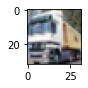

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
    
plot_sample(1)

In [14]:
classes = ["airplane", "automobile","bird","cat", "deer", "dog","frog", "horse", "ship","truck"]
classes[y_train[3][0]]

'deer'

In [15]:
#normalising rgb values from 0 to 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
#one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [24]:
X_train_scaled.shape

32*32*3

3072

In [25]:
#when categorical data, use categorical_crossentropy
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 114s 72ms/step - loss: 1.9313 - accuracy: 0.3090
Epoch 2/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.6437 - accuracy: 0.4175
Epoch 3/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5513 - accuracy: 0.4505
Epoch 4/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4859 - accuracy: 0.4760
Epoch 5/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4407 - accuracy: 0.4947
Epoch 6/50
1563/1563 [==============================] - 121s 77ms/step - loss: 1.3862 - accuracy: 0.5139
Epoch 7/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.3566 - accuracy: 0.5261
Epoch 8/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.3198 - accuracy: 0.5370
Epoch 9/50
1563/1563 [==============================] - 112s 71ms/step - loss: 1.2773 - accuracy: 0.5532
Epoch 10/50
1563/1563 [==============================] 

In [29]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

'cat'

In [30]:
classes[y_test[0][0]]

'cat'

In [31]:
#Comparison between cpu and gpu
#when categorical data, use categorical_crossentropy

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32, 32, 3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'), 
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
    return model

In [32]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_mode = get_model()
    model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 118s 75ms/step - loss: 0.2779 - accuracy: 0.9178
2min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_mode = get_model()
    model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 130s 83ms/step - loss: 0.2583 - accuracy: 0.9261
2min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
